<a href="https://colab.research.google.com/github/hnvivek/NLP_Yelp_Reviews/blob/master/classifying_the_yelp_reviews_using_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I'm using Natural Language Processing (NLP) strategies to analyze Yelp reviews data.

In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load dataset
yelp_df = pd.read_csv("https://raw.githubusercontent.com/hnvivek/NLP_Yelp_Reviews/master/yelp.csv")

In [3]:
# examine the data
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
# print the summary statistics of numercial columns
yelp_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [5]:
# Verify the datatypes and check for any nulls
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
# print the example text review
yelp_df.text[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [7]:
# calculate the length of reviews
yelp_df['length'] = yelp_df.text.apply(len)

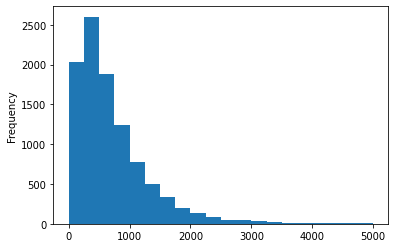

In [8]:
# plot the histogram for the length values
yelp_df.length.plot(bins = 20, kind='hist')

In [9]:
yelp_df.length.describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

In [10]:
# print the review with highest chars 
yelp_df[yelp_df.length==4997].text.iloc[0]

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

In [11]:
# print the reviews with lowest char
yelp_df[yelp_df.length == 1].text.iloc[0]

'X'

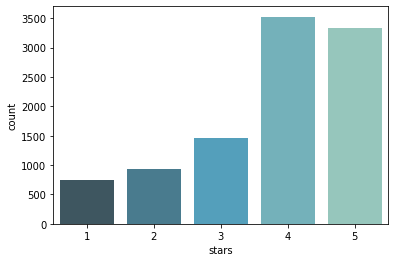

In [12]:
# plot the count of reviews
sns.countplot(yelp_df.stars,palette='GnBu_d')

Most Reviews fall between 4 & 5 star

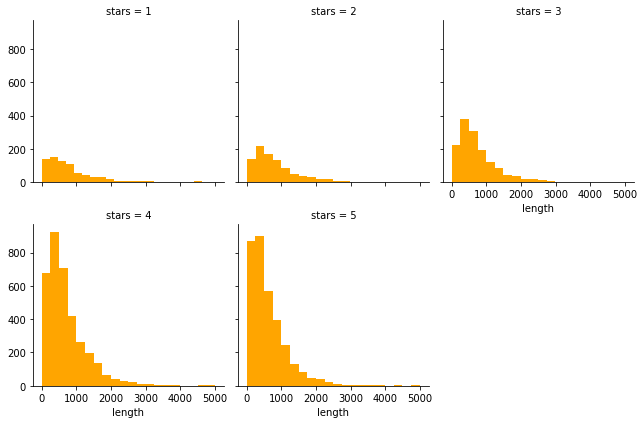

In [13]:
# plot histograms for each stars
g =sns.FacetGrid(data =yelp_df,col='stars',col_wrap=3)
g.map(plt.hist,'length',bins=20,color='orange')

By examing the histograms we can conclude that the people rating 1-3 stars  mostly write less than 400 words.

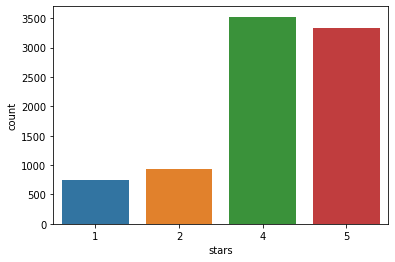

In [14]:
# prepare the data for prediction
sns.countplot(yelp_df[yelp_df.stars!=3].stars)

We will mpa the stars 4 & 5 as 1 (happy Customer) and stars 1 & 2 as 0 (Unhappy Customer) and exclude star 3 as it will have neutral reviews.

In [15]:
# exclude all records having with star 3
yelp_df = yelp_df[yelp_df.stars!=3]

In [16]:
# create function to calcualte the target value
def create_target(stars):
    if stars<3:
        target = 0#
    else:
        target = 1
    return target

In [17]:
# store the value into target column
yelp_df['target'] = yelp_df.stars.apply(create_target)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
# examine the values
yelp_df[['stars','target']]

,stars,target
0,5,1
1,5,1
2,4,1
3,5,1
4,5,1
...,...,...
9994,5,1
9996,4,1
9997,4,1
9998,2,0


In [19]:
# remove punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
# remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
# defining the fuction to remove punctuations & stop words
def text_cleaning(text):
    remove_punctuation = ''.join([char for char in text if char not in string.punctuation])
    remove_stopwords = [word for word in remove_punctuation.split() if word.lower() not in stopwords.words('english')]
    return remove_stopwords

In [22]:
# count vectorization ( 2d matrix containing word frequency)
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer = CountVectorizer(analyzer = text_cleaning)
yelp_vectorizer=CountVectorizer.fit_transform(yelp_df.text)

In [23]:
yelp_vectorizer.shape

(8539, 40526)

In [24]:
X =yelp_vectorizer
y = yelp_df.target.values.reshape(-1,1)
print(X.shape)
print(y.shape)

(8539, 40526)
(8539, 1)


In [25]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train, y_test = train_test_split(X,y,test_size =0.2)

In [26]:
# train model
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

[[1023  288]
 [  31 5489]]


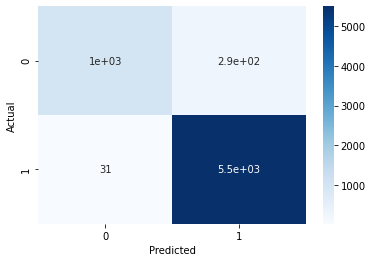

In [27]:
# print the confusion matrix for trained data
from sklearn.metrics import classification_report,confusion_matrix
predict_train = NB_classifier.predict(X_train)
cm = confusion_matrix(y_train,predict_train)
sns.heatmap(cm,annot =True,cmap="Blues")
plt.ylabel("Actual")
plt.xlabel("Predicted")
print(cm)


In [28]:
print(classification_report(y_train,predict_train))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87      1311
           1       0.95      0.99      0.97      5520

    accuracy                           0.95      6831
   macro avg       0.96      0.89      0.92      6831
weighted avg       0.95      0.95      0.95      6831



[[ 199  166]
 [  51 1292]]


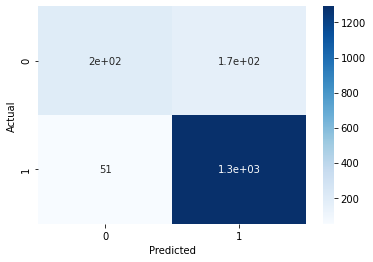

In [29]:
# print the confusion matrix for test data
predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test,predict_test)
sns.heatmap(cm,annot =True,cmap="Blues")
plt.ylabel("Actual")
plt.xlabel("Predicted")
print(cm)


In [30]:
print(classification_report(y_test,predict_test))

              precision    recall  f1-score   support

           0       0.80      0.55      0.65       365
           1       0.89      0.96      0.92      1343

    accuracy                           0.87      1708
   macro avg       0.84      0.75      0.78      1708
weighted avg       0.87      0.87      0.86      1708

